In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
town_data = pd.read_excel('data/TownLevelData.xlsx')
town_data = pd.DataFrame(town_data)

person_data = pd.read_excel('data/UVLTDataAnalysis.xls')
person_data = pd.DataFrame(person_data)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
town_data.head(20)

,TownID,Town,Nprojects,Nacres,Nmembers,MedianHHIncome,MeanHHIncome,PercBAplus,PercAge55Plus
0,1,Bath,9,746.00,0,47386,60413,25.274725,48.844538
1,2,Bradford,20,2258.32,7,48056,58716,30.600000,32.912306
2,3,Canaan,9,1676.35,10,58333,68870,25.300000,33.863520
3,4,Cavendish,0,0.00,0,48750,69230,31.001727,40.359043
4,5,Charlestown,2,408.90,2,42693,50823,14.300000,36.050905
5,6,Chelsea,5,911.50,1,58333,63588,30.000000,37.884471
6,7,Claremont,5,564.51,0,45510,55958,18.600000,27.844907
7,8,Corinth,19,2349.08,3,56719,71381,27.800000,33.715596
8,9,Cornish,22,1124.29,11,75417,82487,38.800000,38.562874
9,10,Croydon,1,26.00,0,71094,79616,16.200000,36.054422


In [4]:
town_data["MedianHHIncome"].mean()

62016.35555555556

In [5]:
person_data.head(15)

,ContactID,FirstName,LastName,City,State,ZipCode,TownID,Town,LandOwnerTownID,DeceasedDate,...,E-2010-11,E-2011-12,E-2012-13,E-2013-14,E-2014-15,E-2015-16,E-2016-17,E-2017-18,E-2018-19,E-2019-20
0,1544,Charles ...,Pitman,Chapel Hill,NC,27517,60,All Other Towns,0,NaT,...,0,0,0,0,0,0,0,0,0,0
1,1545,Pat,Reed,Lebanon,NH,03766,20,Lebanon,0,NaT,...,0,0,0,0,0,0,0,0,0,0
2,1546,David,Davenport,New London,NH,03257,61,All Other Towns NH,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,1547,Patricia,Stevens,Ascutney,VT,05030,41,Weathersfield,41,NaT,...,0,0,0,0,0,0,0,0,0,0
4,1548,Margaret Elizabeth,Stevens,Springfield,VT,05156,34,Springfield,0,2016-05-08,...,0,0,0,0,0,0,0,0,0,0
5,1549,Steven,Stocking,Fairlee,VT,05045,13,Fairlee,13,NaT,...,0,0,0,0,0,0,0,0,0,0
6,1550,Jim,Taylor,Meriden,NH,03770,28,Plainfield,0,NaT,...,0,0,0,0,0,0,0,0,0,0
7,1551,Gerd,Riess,East Thetford,VT,05043,36,Thetford,36,NaT,...,0,0,0,0,0,0,0,0,0,0
8,1552,Ruth,Hubbard,Lebanon,NH,03766,20,Lebanon,0,2014-06-16,...,0,0,0,0,0,0,0,0,0,0
9,1553,Valerie,Mullen,Vershire,VT,05079,40,Vershire,0,2014-12-21,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#calculate mean total donation per person

person_data["U_Tot_Amt"].mean()

576.3622594741204

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b1696ac3240>]],
      dtype=object)

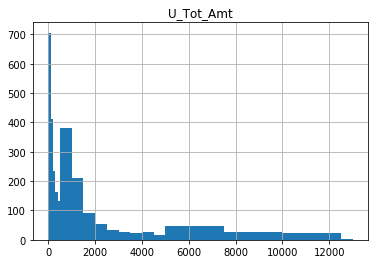

In [7]:
#histogram, divided into uneven bins, start the first bin at 1 rather than 0 since so many individuals donated $0

person_data.hist(column="U_Tot_Amt", bins=[1,100,200,300,400,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,7500,10000,12500,13000])


In [8]:
#check for outliers

person_data.max()

ContactID                        15372
LastName                       willets
TownID                              65
Town                         Woodstock
LandOwnerTownID                     45
DeceasedDate       2018-12-02 00:00:00
DeceasedDateYN                       1
U_Tot_Amt                       538600
U_Tot_Cnt                           19
U-2000-01                      27850.8
U-2001-02                      10223.8
U-2002-03                       100000
U-2003-04                        31000
U-2004-05                        30000
U-2005-06                        25000
U-2006-07                        60500
U-2007-08                      40444.4
U-2008-09                        34500
U-2009-10                        58696
U-2010-11                        26250
U-2011-12                        29375
U-2012-13                        35005
U-2013-14                        74500
U-2014-15                        28000
U-2015-16                        63000
U-2016-17                

In [9]:
#summarize data

person_data.describe(include=[np.number])

,ContactID,TownID,LandOwnerTownID,DeceasedDateYN,U_Tot_Amt,U_Tot_Cnt,U-2000-01,U-2001-02,U-2002-03,U-2003-04,...,E-2010-11,E-2011-12,E-2012-13,E-2013-14,E-2014-15,E-2015-16,E-2016-17,E-2017-18,E-2018-19,E-2019-20
count,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,...,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,13273.0
mean,7508.897235,32.425450,0.942063,0.070820,576.362259,1.146387,18.238108,14.955793,27.062128,27.193417,...,0.018006,0.010698,0.012582,0.018459,0.012657,0.021246,0.025767,0.033677,0.015068,0.0
std,4594.085717,19.398047,5.157163,0.256534,8687.687552,3.258833,346.776071,201.296938,960.510909,485.984727,...,0.132980,0.102882,0.111466,0.134607,0.111794,0.144209,0.158444,0.180404,0.121829,0.0
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3430.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,7095.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,11635.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,15372.000000,65.000000,45.000000,1.000000,538600.000000,19.000000,27850.790000,10223.750000,100000.000000,31000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


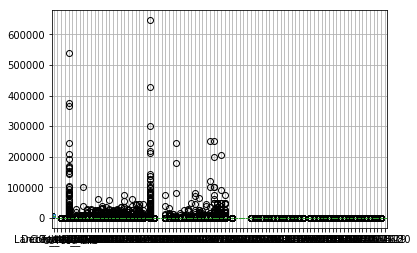

In [10]:
person_data.boxplot()

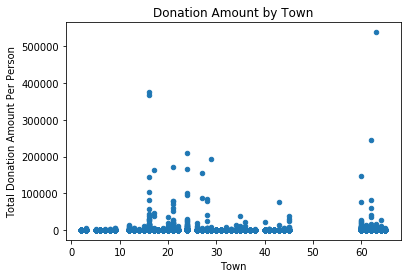

In [11]:
person_data.plot.scatter(x='TownID', y='U_Tot_Amt')
plt.title("Donation Amount by Town")
plt.xlabel("Town")
plt.ylabel("Total Donation Amount Per Person")
plt.show()

#how to change x-axis labels? potentially create some dictionary with correspondence between id and town

In [12]:
#sns.countplot(x='Town', y='U_Tot_Amt', data=person_data)
#person_data.plot.bar(x='Town', y='U_Tot_Amt')

In [20]:
#thank you Drew Leonard for teaching me how to use groupby
#this is possibly the least efficient way to plot in order of bar size but it works 

#town_summed = person_data.groupby(['Town'])[['U_Tot_Amt']].sum()

town_summed = person_data.groupby(['Town'])[['U_Tot_Amt']].sum()
town_summed = town_summed.sort_values('U_Tot_Amt', ascending=False)
town_summed

,U_Tot_Amt
Town,
Hanover,1955050.28
Norwich,939675.39
Lyme,804463.62
All Other Towns VT,621483.74
All Other Towns MA,596313.31
All Other Towns,576870.41
Hartford,282554.01
Plainfield,280703.80
Piermont,249743.40


Text(0, 0.5, 'Donation Amount in Dollars')

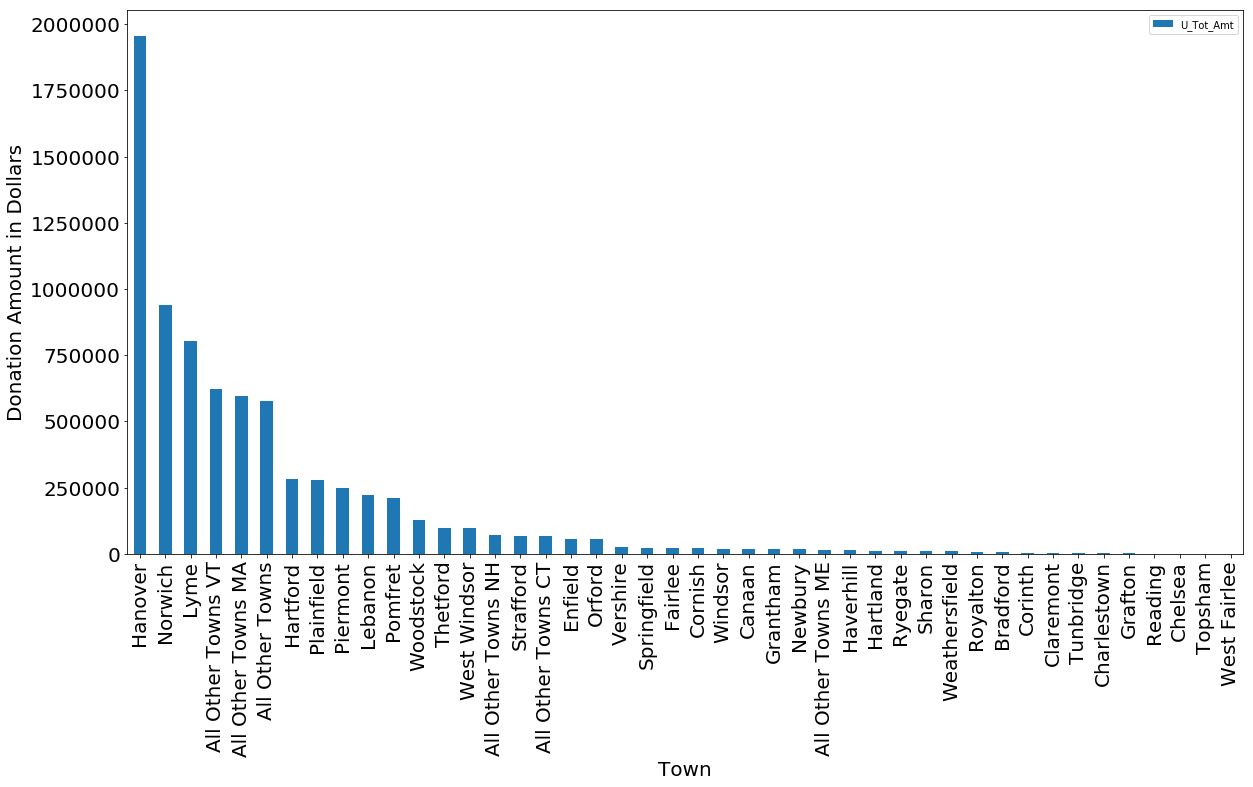

In [21]:
#now we can make a bar plot of the total donations coming from each town

town_summed.plot.bar(figsize=(20,10), fontsize=20)
plt.xlabel('Town', fontsize=20)
plt.ylabel('Donation Amount in Dollars', fontsize=20)
